In [84]:
# Import basic packages
import pandas as pd
import numpy as np

In [85]:
#Read dataset
df = pd.read_csv('/kaggle/input/healthy-diet-recipes-a-comprehensive-dataset/All_Diets.csv',sep=',')
df.head()

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,2022-10-16,17:20:09
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,2022-10-16,17:20:09
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,2022-10-16,17:20:09
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,2022-10-16,17:20:09
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,2022-10-16,17:20:09


In [86]:
# Check null
df.isna().any()

Diet_type          False
Recipe_name        False
Cuisine_type       False
Protein(g)         False
Carbs(g)           False
Fat(g)             False
Extraction_day     False
Extraction_time    False
dtype: bool

In [87]:
# Check duplicated
df.duplicated().value_counts()

False    7801
True        5
dtype: int64

In [88]:
# Load duplicated
df[df.duplicated(keep=False) == True]

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
2774,vegan,Strawberry Rhubarb Jam {Vegan},american,2.48,155.82,22.73,2022-10-16,20:13:34
2778,vegan,Strawberry Rhubarb Jam {Vegan},american,2.48,155.82,22.73,2022-10-16,20:13:34
2785,vegan,Strawberry Rhubarb Jam {Vegan},american,2.48,155.82,22.73,2022-10-16,20:13:40
2789,vegan,Strawberry Rhubarb Jam {Vegan},american,2.48,155.82,22.73,2022-10-16,20:13:40
4328,mediterranean,Mediterranean Marinade,mediterranean,1.50,12.79,68.75,2022-10-16,16:43:20
4338,mediterranean,Mediterranean Marinade,mediterranean,1.50,12.79,68.75,2022-10-16,16:43:20
4409,mediterranean,Mediterranean Grain Salad,mediterranean,14.02,48.13,16.24,2022-10-16,16:43:47
4412,mediterranean,Mediterranean Grain Salad,mediterranean,14.02,48.13,16.24,2022-10-16,16:43:47
5183,mediterranean,Mediterranean Dip,mediterranean,21.71,40.46,32.12,2022-10-16,16:48:18
5184,mediterranean,Mediterranean Dip,mediterranean,21.71,40.46,32.12,2022-10-16,16:48:18


In [89]:
# Dropout duplicated and double check
df_nodup = df.drop_duplicates()
df_nodup.duplicated().value_counts()

False    7801
dtype: int64

In [90]:
# Check Diet_type
df_nodup['Diet_type'].value_counts(normalize=True)

mediterranean    0.224330
dash             0.223689
vegan            0.194847
keto             0.193821
paleo            0.163312
Name: Diet_type, dtype: float64

In [91]:
# Check Cuisine_type
df_nodup['Cuisine_type'].value_counts(normalize=True)

american            0.372388
mediterranean       0.223177
italian             0.102423
french              0.077426
world               0.033201
british             0.030637
mexican             0.028714
nordic              0.019485
south east asian    0.018972
south american      0.017562
asian               0.016152
chinese             0.015383
indian              0.011793
middle eastern      0.011665
eastern europe      0.007050
japanese            0.006409
central europe      0.004358
caribbean           0.002307
kosher              0.000897
Name: Cuisine_type, dtype: float64

In [92]:
# Check Protein(g), Carbs(g) and Fat(g)
df_nodup.describe()

,Protein(g),Carbs(g),Fat(g)
count,7801.000000,7801.000000,7801.000000
mean,83.279436,152.167746,117.382903
std,89.805850,185.952165,122.117425
min,0.000000,0.060000,0.000000
25%,24.470000,36.160000,41.100000
50%,56.310000,93.430000,84.930000
75%,112.380000,205.970000,158.300000
max,1273.610000,3405.550000,1930.240000


In [93]:
# Relationship between Diet_type and Protein(g),Carbs(g) and Fat(g)
import matplotlib
import matplotlib.pyplot as plt

Text(0, 0.5, 'Nutritious Information')

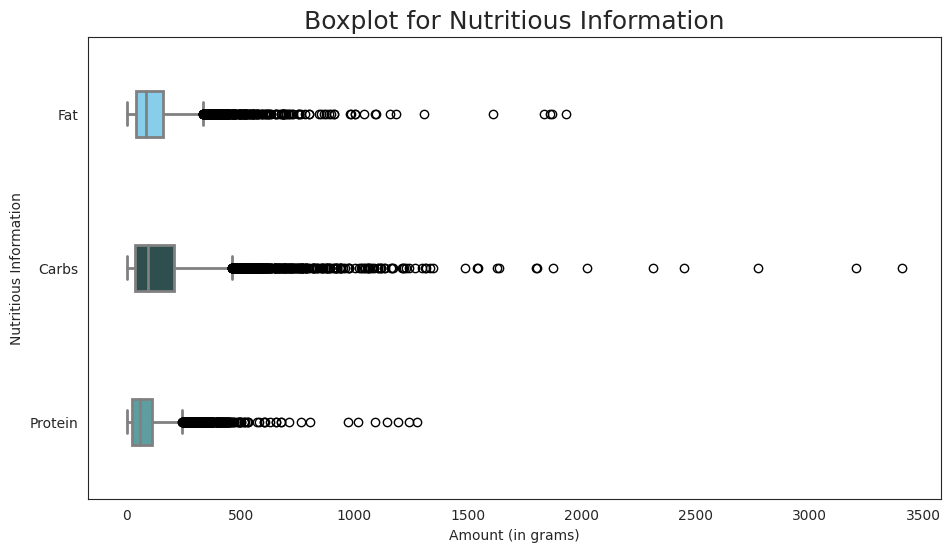

In [94]:
# Box Plot
plotdata = pd.DataFrame({
    "Protein(g)":list(df_nodup[['Protein(g)']].squeeze()),
    "Carbs(g)":list(df_nodup[['Carbs(g)']].squeeze()),
    "Fat(g)":list(df_nodup[['Fat(g)']].squeeze())})

plt.figure(figsize =(11, 6))

bplots = plt.boxplot(plotdata, vert = 0, patch_artist = True, labels=["Protein","Carbs","Fat"])

colors = ["cadetblue","darkslategray","skyblue"]
for i, bplot in enumerate(bplots['boxes']):
    bplot.set(color='gray', linewidth=2)
    bplot.set(facecolor = colors[i])

for whisker in bplots['whiskers']:
    whisker.set(color='gray', linewidth=2)

for cap in bplots['caps']:
    cap.set(color='gray', linewidth=2)

for median in bplots['medians']:
    median.set(color='gray', linewidth=2)

plt.title("Boxplot for Nutritious Information", loc="center", fontsize=18)
plt.xlabel("Amount (in grams)")
plt.ylabel("Nutritious Information")

In [95]:
import seaborn as sns
sns.set_style("white")

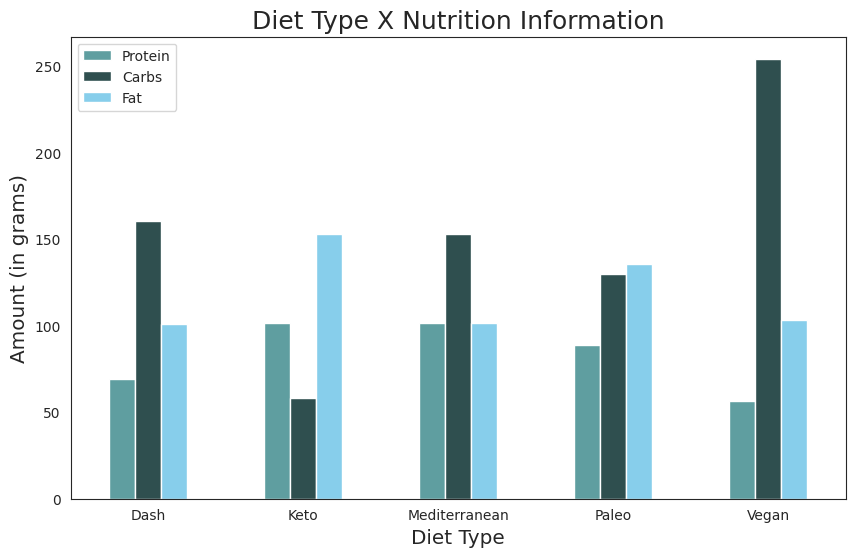

In [96]:
# Nutrition Information
analise1 = df_nodup.groupby("Diet_type").aggregate({'Protein(g)':'mean','Carbs(g)':'mean','Fat(g)':'mean'})
analise1_frame = analise1.reset_index()

# Plot
plotdata = pd.DataFrame({
    "Protein":list(analise1_frame[['Protein(g)']].squeeze()),
    "Carbs":list(analise1_frame[['Carbs(g)']].squeeze()),
    "Fat":list(analise1_frame[['Fat(g)']].squeeze())
    }, 
    index = ['Dash', 'Keto', 'Mediterranean','Paleo', 'Vegan']
)

plotdata.plot(kind="bar", color=["cadetblue","darkslategray","skyblue"],figsize=(10, 6),rot=0)
plt.title("Diet Type X Nutrition Information",loc="center", fontsize=18)#fontsize="x-large",weight="bold")
plt.xlabel("Diet Type",fontsize="x-large")
plt.ylabel("Amount (in grams)", fontsize="x-large");

In [97]:
# Correlation between Nutrition Information
x = df_nodup['Protein(g)']
y = df_nodup['Carbs(g)']
z = df_nodup['Fat(g)']
xyz = [x,y,z]

corr_matrix = np.corrcoef(xyz).round(decimals=2)
corr_matrix

array([[1.  , 0.16, 0.48],
       [0.16, 1.  , 0.27],
       [0.48, 0.27, 1.  ]])

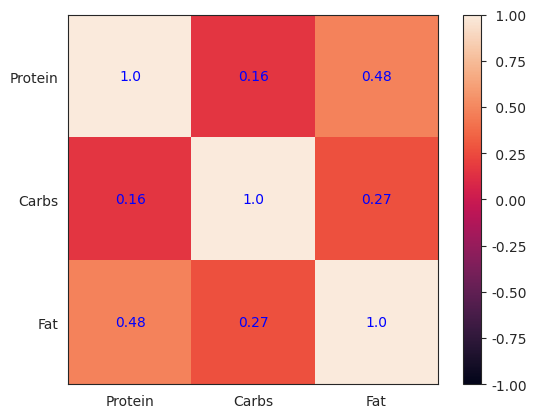

In [98]:
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('Protein', 'Carbs', 'Fat'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('Protein', 'Carbs', 'Fat'))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
                color='b')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')

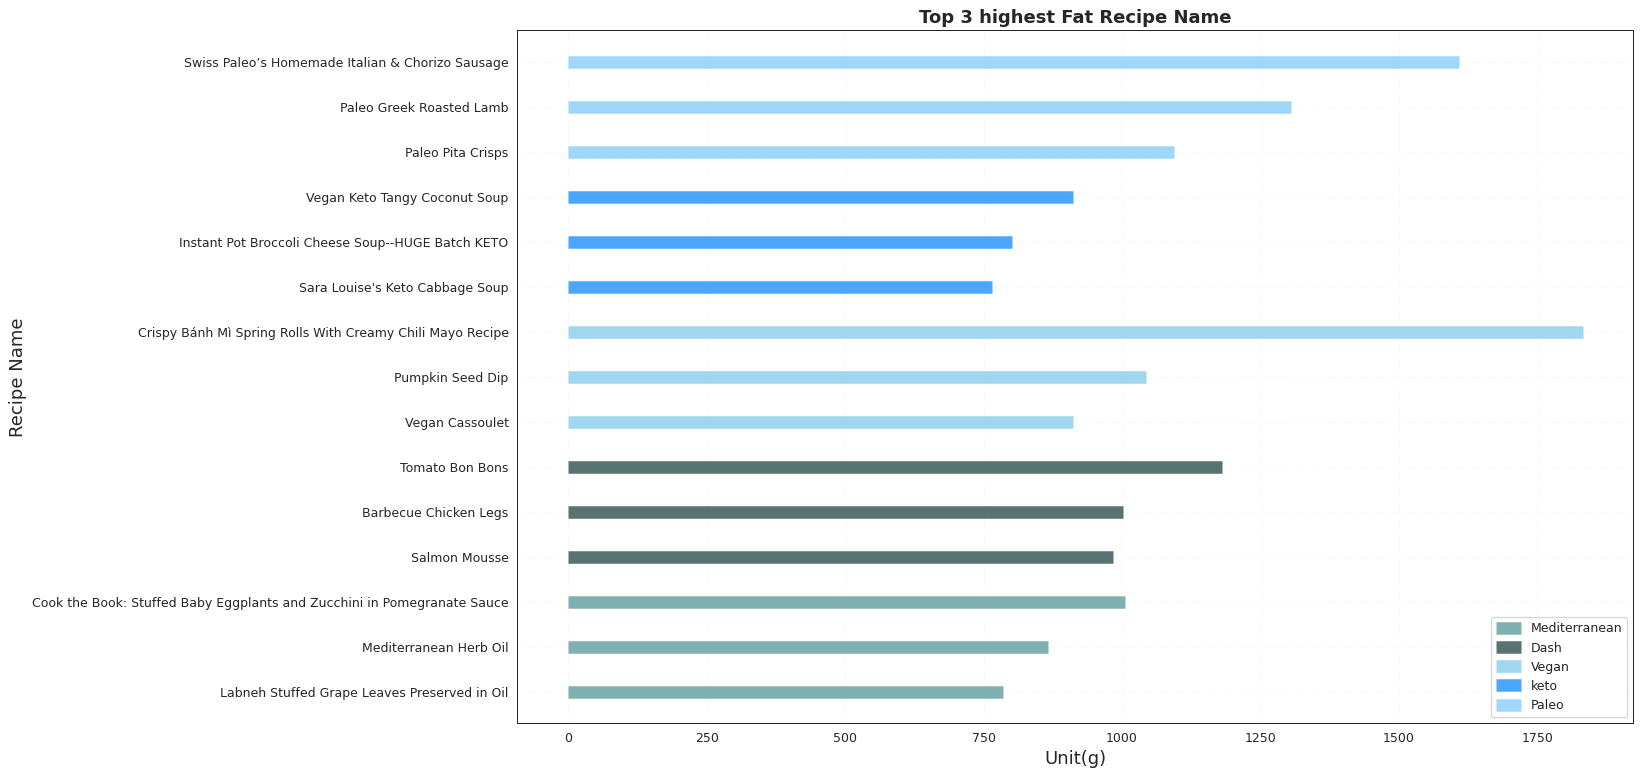

In [99]:
#Recioe with low and high fat
rec_low_fat = df_nodup.groupby(["Diet_type","Recipe_name","Cuisine_type"]).aggregate({'Fat(g)':'min'}).reset_index().sort_values(by=['Diet_type','Fat(g)'])

# Plot Top 3 recipe with high fat
dash_hf = rec_low_fat[rec_low_fat['Diet_type'] == 'dash'][-4:-1:]
med_hf = rec_low_fat[rec_low_fat['Diet_type'] == 'mediterranean'][-4:-1:]
vegan_hf = rec_low_fat[rec_low_fat['Diet_type'] == 'vegan'][-4:-1:]
keto_hf = rec_low_fat[rec_low_fat['Diet_type'] == 'keto'][-4:-1:]
paleo_hf = rec_low_fat[rec_low_fat['Diet_type'] == 'paleo'][-4:-1:]

# Prepare Data
df = pd.concat([med_hf, dash_hf, vegan_hf, keto_hf, paleo_hf])
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(16,10), dpi= 90)
# plt.hlines(y=df['Recipe_name']['dash'], xmin=0, xmax=df['Fat(g)'], 
#            color=["cadetblue","darkslategray","skyblue","dodgerblue","lightskyblue"],
#            alpha=0.8, linewidth=10)
plt.hlines(y=med_hf['Recipe_name'], xmin=0, xmax=med_hf['Fat(g)'], 
           color="cadetblue",
           alpha=0.8, linewidth=10)
plt.hlines(y=dash_hf['Recipe_name'], xmin=0, xmax=dash_hf['Fat(g)'], 
           color="darkslategray",
           alpha=0.8, linewidth=10)
plt.hlines(y=vegan_hf['Recipe_name'], xmin=0, xmax=vegan_hf['Fat(g)'], 
           color="skyblue",
           alpha=0.8, linewidth=10)
plt.hlines(y=keto_hf['Recipe_name'], xmin=0, xmax=keto_hf['Fat(g)'], 
           color="dodgerblue",
           alpha=0.8, linewidth=10)
plt.hlines(y=paleo_hf['Recipe_name'], xmin=0, xmax=paleo_hf['Fat(g)'], 
           color="lightskyblue",
           alpha=0.8, linewidth=10)

# Decorations
plt.title('Top 3 highest Fat Recipe Name', fontdict={'size':20},fontsize="x-large",weight="bold")
plt.grid(linestyle='--', alpha=0.1)
plt.xlabel('Unit(g)',fontsize="x-large")
plt.ylabel('Recipe Name',fontsize="x-large")
plt.legend(["Mediterranean","Dash","Vegan","keto","Paleo"], loc ="lower right")


## Tokenization

Devide paragrah into sentences, sentences into works (called token)

In [100]:
# Import tokenize 
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


In [101]:
# Set the diet type into separate dataset
med = df[df['Diet_type'] == 'mediterranean']
dash = df[df['Diet_type'] == 'dash']
vegan = df[df['Diet_type'] == 'vegan']
keto = df[df['Diet_type'] == 'keto']
paleo = df[df['Diet_type'] == 'paleo']

# Split sentences into word (token) using word tokenze
med['wt'] = [word_tokenize(med['Recipe_name'][i]) for i in med.index]
dash['wt'] = [word_tokenize(dash['Recipe_name'][i]) for i in dash.index]
vegan['wt'] = [word_tokenize(vegan['Recipe_name'][i]) for i in vegan.index]
keto['wt'] = [word_tokenize(keto['Recipe_name'][i]) for i in keto.index]
paleo['wt'] = [word_tokenize(paleo['Recipe_name'][i]) for i in paleo.index]

/tmp/ipykernel_36/832939127.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med['wt'] = [word_tokenize(med['Recipe_name'][i]) for i in med.index]
/tmp/ipykernel_36/832939127.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dash['wt'] = [word_tokenize(dash['Recipe_name'][i]) for i in dash.index]
/tmp/ipykernel_36/832939127.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [102]:
# Word Punctuation Tokenizer
from nltk.tokenize import WordPunctTokenizer

tokenizer = WordPunctTokenizer()

# Split sentences into word (token) using Word Punct Tokenizer (here splits punctuations)
med['wt2'] = [tokenizer.tokenize(med['Recipe_name'][i]) for i in med.index]
dash['wt2'] = [tokenizer.tokenize(dash['Recipe_name'][i]) for i in dash.index]
vegan['wt2'] = [tokenizer.tokenize(vegan['Recipe_name'][i]) for i in vegan.index]
keto['wt2'] = [tokenizer.tokenize(keto['Recipe_name'][i]) for i in keto.index]
paleo['wt2'] = [tokenizer.tokenize(paleo['Recipe_name'][i]) for i in paleo.index]

/tmp/ipykernel_36/4033403685.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med['wt2'] = [tokenizer.tokenize(med['Recipe_name'][i]) for i in med.index]
/tmp/ipykernel_36/4033403685.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dash['wt2'] = [tokenizer.tokenize(dash['Recipe_name'][i]) for i in dash.index]
/tmp/ipykernel_36/4033403685.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

## REGEX

Use regex to dropout ponctuations

In [103]:
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import regexp_tokenize

tokenizerRE = RegexpTokenizer(r'\w+', gaps = False)

In [104]:
# Apply regex for punctuations
med['re'] = [tokenizerRE.tokenize(med['Recipe_name'][i]) for i in med.index]
dash['re'] = [tokenizerRE.tokenize(dash['Recipe_name'][i]) for i in dash.index]
vegan['re'] = [tokenizerRE.tokenize(vegan['Recipe_name'][i]) for i in vegan.index]
keto['re'] = [tokenizerRE.tokenize(keto['Recipe_name'][i]) for i in keto.index]
paleo['re'] = [tokenizerRE.tokenize(paleo['Recipe_name'][i]) for i in paleo.index]
paleo

/tmp/ipykernel_36/2377833629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med['re'] = [tokenizerRE.tokenize(med['Recipe_name'][i]) for i in med.index]
/tmp/ipykernel_36/2377833629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dash['re'] = [tokenizerRE.tokenize(dash['Recipe_name'][i]) for i in dash.index]
/tmp/ipykernel_36/2377833629.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,index,Diet_type,Recipe_name,Cuisine_type,Fat(g),wt,wt2,re
12,5320,paleo,Paleo Pita Crisps,mediterranean,1094.53,"[Paleo, Pita, Crisps]","[Paleo, Pita, Crisps]","[Paleo, Pita, Crisps]"
13,5217,paleo,Paleo Greek Roasted Lamb,mediterranean,1305.07,"[Paleo, Greek, Roasted, Lamb]","[Paleo, Greek, Roasted, Lamb]","[Paleo, Greek, Roasted, Lamb]"
14,5645,paleo,Swiss Paleo’s Homemade Italian & Chorizo Sausage,italian,1608.54,"[Swiss, Paleo, ’, s, Homemade, Italian, &, Cho...","[Swiss, Paleo, ’, s, Homemade, Italian, &, Cho...","[Swiss, Paleo, s, Homemade, Italian, Chorizo, ..."


## STOP WORDS

Common words that usually don't have meaning

In [105]:
from nltk.corpus import stopwords
nltk.download('stopwords')
english_stops = set(stopwords.words('english'))

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [106]:
# Apply stop word to column with regex applied
med_words = [palavra.lower() for i in med.index for palavra in med['re'][i] if palavra not in english_stops]
dash_words = [palavra.lower() for i in dash.index for palavra in dash['re'][i] if palavra not in english_stops]
vegan_words = [palavra.lower() for i in vegan.index for palavra in vegan['re'][i] if palavra not in english_stops]
keto_words = [palavra.lower() for i in keto.index for palavra in keto['re'][i] if palavra not in english_stops]
paleo_words = [palavra.lower() for i in paleo.index for palavra in paleo['re'][i] if palavra not in english_stops]
paleo_words

['paleo',
 'pita',
 'crisps',
 'paleo',
 'greek',
 'roasted',
 'lamb',
 'swiss',
 'paleo',
 'homemade',
 'italian',
 'chorizo',
 'sausage']

## Stemming

Stem removes suffix and prefix from words

In [107]:
from nltk.stem import PorterStemmer
from nltk.stem import RegexpStemmer

porter_stemmer = PorterStemmer()

In [108]:
# Apply Stemming
med_words = [porter_stemmer.stem(word) for word in med_words]
dash_words = [porter_stemmer.stem(word) for word in dash_words]
vegan_words = [porter_stemmer.stem(word) for word in vegan_words]
keto_words = [porter_stemmer.stem(word) for word in keto_words]
paleo_words = [porter_stemmer.stem(word) for word in paleo_words]
keto_words

['sara',
 'louis',
 'keto',
 'cabbag',
 'soup',
 'instant',
 'pot',
 'broccoli',
 'chees',
 'soup',
 'huge',
 'batch',
 'keto',
 'vegan',
 'keto',
 'tangi',
 'coconut',
 'soup']

In [109]:
# Word Cloud 
import wordcloud
from wordcloud import WordCloud

In [110]:
text_aux = [med_words, dash_words, vegan_words, keto_words, paleo_words]

In [111]:
text = ' '
for i in text_aux:
    for j in i:
        text = text + ' ' + ''.join(j)
text

'  labneh stuf grape leav preserv oil mediterranean herb oil cook book stuf babi eggplant zucchini pomegran sauc salmon mouss barbecu chicken leg tomato bon bon vegan cassoulet pumpkin seed dip crispi bánh mì spring roll with creami chili mayo recip sara louis keto cabbag soup instant pot broccoli chees soup huge batch keto vegan keto tangi coconut soup paleo pita crisp paleo greek roast lamb swiss paleo homemad italian chorizo sausag'

(-0.5, 399.5, 199.5, -0.5)

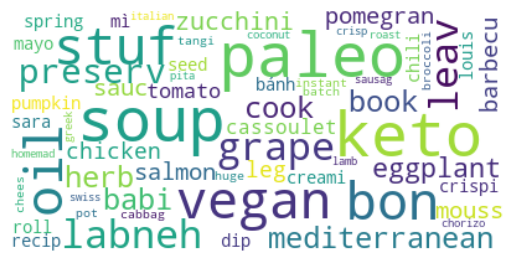

In [112]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")